 # Supervised Learning: More Regression

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#Please read the sklearn documentation if you need to figure out the inputs and outputs of these functions
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error


 ## PART 1: SIMPLE LINEAR REGRESSION



 We'll analyze the relationship between study hours and exam scores using three different methods.

Dataset:
   Hours_Studied  Exam_Score
0            1.5          45
1            2.0          51
2            2.5          58
3            3.0          62
4            3.5          68
5            4.0          73
6            4.5          78
7            5.0          84
8            5.5          88
9            6.0          93


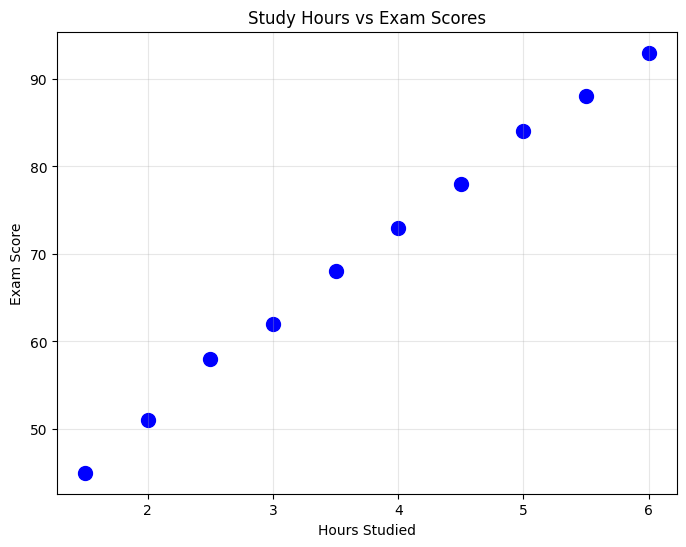

In [65]:
# Dataset: Study Hours vs Exam Scores
data = {
    'Hours_Studied': [1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0],
    'Exam_Score': [45, 51, 58, 62, 68, 73, 78, 84, 88, 93]
}
df = pd.DataFrame(data)

print("Dataset:")
print(df)

# Visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(df['Hours_Studied'], df['Exam_Score'], color='blue', s=100)
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.title('Study Hours vs Exam Scores')
plt.grid(True, alpha=0.3)
plt.show()


 ### TASK 1: Manual Least Squares Calculation



 Calculate the slope (m) and intercept (b) for y = mx + b using the **FIRST 5 DATA POINTS ONLY**.



 **Formulas:**

 - Slope: $m = \frac{n\sum xy - \sum x \sum y}{n\sum x^2 - (\sum x)^2}$

 - Intercept: $b = \frac{\sum y - m\sum x}{n}$

In [66]:
# Use first 5 data points
x_manual = df['Hours_Studied'][:5].values
y_manual = df['Exam_Score'][:5].values

n = len(x_manual)

# TODO: Calculate sums needed
sum_x = np.sum(x_manual) # Calculate sum of x
sum_y = np.sum(y_manual) # Calculate sum of y
sum_xy = np.sum(x_manual * y_manual) # Calculate sum of x*y
sum_x_squared = np.sum(x_manual**2) # Calculate sum of x²

# TODO: Calculate slope and intercept using formulas above
m_manual = (n * sum_xy - sum_x * sum_y)/(n * sum_x_squared * (sum_x)**2)
b_manual = (sum_y-m_manual * sum_x)/n

print("TASK 1 - Manual Calculation (first 5 points):")
print(f"Slope (m): {m_manual}")
print(f"Intercept (b): {b_manual}")
print(f"Equation: y = {m_manual:.2f}x + {b_manual:.2f}\n")

# TODO: Make predictions and calculate errors
y_pred_manual = m_manual * x_manual + b_manual # Calculate predictions using y = mx + b
mae_manual = mean_absolute_error(y_manual, y_pred_manual) # Calculate MAE using mean_absolute_error
mse_manual = mean_squared_error(y_manual, y_pred_manual) # Calculate MSE using mean_squared_error

print(f"MAE: {mae_manual:.2f}")
print(f"MSE: {mse_manual:.2f}")


TASK 1 - Manual Calculation (first 5 points):
Slope (m): 0.005404444444444444
Intercept (b): 56.78648888888889
Equation: y = 0.01x + 56.79

MAE: 7.04
MSE: 65.30


 ### TASK 2: NumPy lstsq (Full Dataset)



 Use `np.linalg.lstsq` to find the best fit line for all 10 data points.



 #### Why Add a Column of Ones?



 When we use `np.linalg.lstsq`, we're solving the matrix equation: **Xβ = y**



 For a linear regression equation **y = mx + b**, we need to find both:

 - **m** (slope)

 - **b** (intercept)



 The design matrix must be structured so that matrix multiplication gives us: **b·1 + m·x**



 ```

 Design Matrix (X):        Coefficients (β):     Result (y):

 [1  x₁]                   [b]                   [b·1 + m·x₁]

 [1  x₂]           ×       [m]          =        [b·1 + m·x₂]

 [1  x₃]                                         [b·1 + m·x₃]

 ...

 ```



 **Key Points:**

 - The column of ones multiplies with the intercept **b** to add that constant term to each prediction

 - The column of x values multiplies with the slope **m** to add the variable component

 - **Without the ones column:** We'd only fit lines through the origin (b=0): y = mx

 - **With the ones column:** We can fit any line: y = mx + b

In [67]:
# TODO: Prepare the design matrix
# Hint: Use np.column_stack to combine a column of ones with the Hours_Studied values
X_numpy = np.column_stack((np.ones(len(df["Hours_Studied"])), df["Hours_Studied"].values)) # Create design matrix [ones, x_values]
y_numpy = df['Exam_Score'].values

# TODO: Use np.linalg.lstsq
solution, residuals, rank, s = np.linalg.lstsq(X_numpy, y_numpy) # Complete this line

# TODO: Extract coefficients
b_numpy =  solution[0] # Extract intercept (first element)
m_numpy =  solution[1] # Extract slope (second element)

print("TASK 2 - NumPy lstsq (all 10 points):")
print(f"Slope (m): {m_numpy}")
print(f"Intercept (b): {b_numpy}")
print(f"Equation: y = {m_numpy:.2f}x + {b_numpy:.2f}\n")

# TODO: Calculate predictions and errors
y_pred_numpy = m_numpy * df["Hours_Studied"].values + b_numpy # Calculate predictions (matrix multiplication)
mae_numpy = mean_absolute_error(y_numpy, y_pred_numpy) # Calculate MAE
mse_numpy =  mean_squared_error(y_numpy, y_pred_numpy) # Calculate MSE

print(f"MAE: {mae_numpy:.2f}")
print(f"MSE: {mse_numpy:.2f}")


TASK 2 - NumPy lstsq (all 10 points):
Slope (m): 10.593939393939403
Intercept (b): 30.27272727272725
Equation: y = 10.59x + 30.27

MAE: 0.61
MSE: 0.52


 ### TASK 3: Scikit-learn LinearRegression (Full Dataset)



 Use sklearn's `LinearRegression` class.



 **Note:** sklearn automatically handles the intercept internally (with `fit_intercept=True` by default), so we don't need to add a column of ones!

In [68]:
# TODO: Reshape X for sklearn (needs 2D array)
X_sklearn = df["Hours_Studied"].values.reshape(-1,1) # Reshape Hours_Studied to (-1, 1)
y_sklearn = df['Exam_Score'].values

# TODO: Create and fit the model
model =LinearRegression() # Create LinearRegression object
# TODO: Fit the model
model.fit(X_sklearn, y_sklearn)

# TODO: Extract coefficients
m_sklearn = model.coef_[0] # Get slope from model.coef_
b_sklearn = model.intercept_ #Get intercept from model.intercept_

print("TASK 3 - Sklearn LinearRegression (all 10 points):")
print(f"Slope (m): {m_sklearn}")
print(f"Intercept (b): {b_sklearn}")
print(f"Equation: y = {m_sklearn:.2f}x + {b_sklearn:.2f}\n")

# TODO: Calculate predictions and errors
y_pred_sklearn = model.predict(X_sklearn) #Make predictions
mae_sklearn = mean_absolute_error(y_sklearn, y_pred_sklearn) # Calculate MAE
mse_sklearn = mean_squared_error(y_sklearn, y_pred_sklearn) # Calculate MSE

print(f"MAE: {mae_sklearn:.2f}")
print(f"MSE: {mse_sklearn:.2f}")


TASK 3 - Sklearn LinearRegression (all 10 points):
Slope (m): 10.593939393939394
Intercept (b): 30.272727272727273
Equation: y = 10.59x + 30.27

MAE: 0.61
MSE: 0.52


 ### TASK 4: Comparison and Discussion

In [69]:
print("="*70)
print("COMPARISON OF ALL THREE METHODS:")
print("="*70)
print(f"{'Method':<30} {'Slope':<12} {'Intercept':<12} {'MAE':<10} {'MSE':<10}")
print("-"*70)
# TODO: Fill in the comparison table with your results
print(f"{'Manual (5 points)':<30} {m_manual:<12.4f} {b_manual:<12.4f} {mae_manual:<10.2f} {mse_manual:<10.2f}")
print(f"{'NumPy (10 points)':<30} {m_numpy:<12.4f} {b_numpy:<12.4f} {mae_numpy:<10.2f} {mse_manual:<10.2f}")
print(f"{'Sklearn (10 points)':<30} {m_sklearn:<12.4f} {b_sklearn:<12.4f} {mae_sklearn:<10.2f} {mse_sklearn:<10.2f}")


COMPARISON OF ALL THREE METHODS:
Method                         Slope        Intercept    MAE        MSE       
----------------------------------------------------------------------
Manual (5 points)              0.0054       56.7865      7.04       65.30     
NumPy (10 points)              10.5939      30.2727      0.61       65.30     
Sklearn (10 points)            10.5939      30.2727      0.61       0.52      


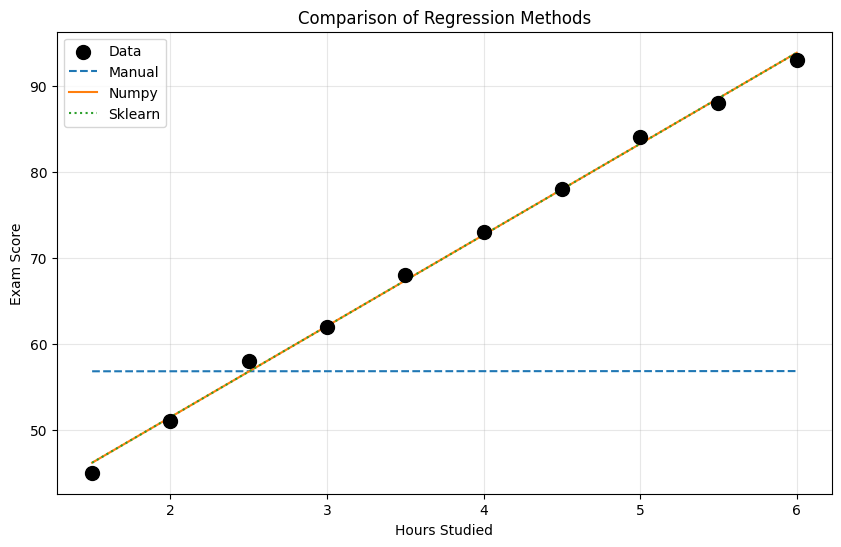

In [70]:
# TODO: Plot all three regression lines
plt.figure(figsize=(10, 6))
plt.scatter(df['Hours_Studied'], df['Exam_Score'], color='black', s=100, label='Data', zorder=3)

# TODO: Create x range for plotting
x_range = np.linspace(df["Hours_Studied"].min(), df["Hours_Studied"].max(), 100)

# TODO: Plot each regression line with different styles
# Hint: Use different linestyles: '--', '-', ':'
plt.plot(x_range, m_manual * x_range + b_manual, "--", label = "Manual")
plt.plot(x_range, m_numpy * x_range + b_numpy, "-", label = "Numpy")
plt.plot(x_range, m_sklearn * x_range + b_sklearn, ":", label = "Sklearn")

plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.title('Comparison of Regression Methods')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


 ### Discussion Questions



 **1. Why do the manual calculations differ from NumPy and sklearn?**



 Because for the manual calculations, we only used the first five data points to calculated the m and b, but for the Numpy and sklearn method, all ten data points were used



 ---



 **2. Why are NumPy and sklearn results nearly identical?**



 Both methods use all ten data points, so they are computing the same best fit line for all the data points, so the line is identical 



 ---



 **3. Which method produced the lowest error? Why?**


The numpy and sklearn method produced the lowest error (mae of 0.61 and mse of 0.52) because the line was evaluated using all the data points, so it will try to find a line that minimizes error for all the data points, while the manual method only used 5, so there larger errors from the other five data points
 



 ---

 ## PART 2: MULTIPLE LINEAR REGRESSION



 Now we'll predict house prices using multiple features.

In [71]:
# Dataset: House Prices
house_data = {
    'Size_sqft': [1200, 1500, 1800, 2000, 2200, 2500, 2800, 3000, 3200, 3500,
                  1300, 1600, 1900, 2100, 2400, 2600, 2900, 3100, 3300, 3600],
    'Bedrooms': [2, 3, 3, 3, 4, 4, 4, 4, 5, 5,
                 2, 3, 3, 4, 4, 4, 4, 5, 5, 5],
    'Age_years': [15, 20, 10, 5, 8, 3, 12, 6, 15, 2,
                  18, 12, 8, 10, 5, 7, 4, 9, 11, 1],
    'Price_1000s': [180, 210, 250, 280, 310, 350, 360, 400, 420, 480,
                    190, 230, 270, 300, 340, 370, 390, 430, 450, 510]
}
house_df = pd.DataFrame(house_data)

print("House Price Dataset:")
print(house_df)


House Price Dataset:
    Size_sqft  Bedrooms  Age_years  Price_1000s
0        1200         2         15          180
1        1500         3         20          210
2        1800         3         10          250
3        2000         3          5          280
4        2200         4          8          310
5        2500         4          3          350
6        2800         4         12          360
7        3000         4          6          400
8        3200         5         15          420
9        3500         5          2          480
10       1300         2         18          190
11       1600         3         12          230
12       1900         3          8          270
13       2100         4         10          300
14       2400         4          5          340
15       2600         4          7          370
16       2900         4          4          390
17       3100         5          9          430
18       3300         5         11          450
19       3600      

 ### TASK 5: Justify Multiple Linear Regression



 Calculate correlations to understand relationships between features and price.

In [72]:
print("Correlations with Price:")
# TODO: Calculate correlation between each feature and price
for col in ['Size_sqft', 'Bedrooms', 'Age_years']:
    corr = house_df[col].corr(house_df["Price_1000s"]) # Calculate correlation
    print(f"{col}: {corr:.3f}")


Correlations with Price:
Size_sqft: 0.995
Bedrooms: 0.944
Age_years: -0.622


 **Why should we use multiple linear regression instead of simple linear regression?**

Because there are multiple variables used to predict house prices, not just one, which would be the case when using simple linear regression



 ---

 ### TASK 6: Implement Multiple Linear Regression

In [73]:
# TODO: Prepare features and target
X_multi = house_df[['Size_sqft', 'Bedrooms', 'Age_years']] # Select feature columns
y_multi = house_df["Price_1000s"] # Select target column

# TODO: Split into training and testing sets (80-20 split)
# The purpose of splitting the data into a training and testing set is to save some of the data to test the model that we trained.
# The test data set needs to be separate from the training data so we can simulate "new" situations before we put our model out in the real world.
# Hint: There is a very helpful sklearn method you should use for this step
X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size = 0.2, random_state= 42 )

# TODO: Create and train the model
mlr_model = LinearRegression() # Create LinearRegression object
# TODO: Fit the model
mlr_model.fit(X_train, y_train)


# TODO: Make predictions
y_train_pred = mlr_model.predict(X_train) # Predictions on training set
y_test_pred = mlr_model.predict(X_test) # Predictions on test set

# TODO: Extract coefficients
coefficients = mlr_model.coef_ # Get coefficients
intercept = mlr_model.intercept_ # Get intercept

print("Model Coefficients:")
print(f"Intercept: {intercept:.2f}")
for i, col in enumerate(X_multi.columns):
    print(f"{col}: {coefficients[i]:.2f}")  # TODO: Fill in actual coefficient

print("\nModel Equation:")
print(f"Price = {intercept:.2f} + {coefficients[0]:.2f} * Size + {coefficients[1]:.2f} * Bedrooms + {coefficients[2]:.2f} * Age")  # TODO: Complete


Model Coefficients:
Intercept: 35.30
Size_sqft: 0.11
Bedrooms: 9.74
Age_years: -1.47

Model Equation:
Price = 35.30 + 0.11 * Size + 9.74 * Bedrooms + -1.47 * Age


 ### TASK 7: Calculate and Interpret Errors

In [74]:
# TODO: Calculate training errors (how far were predictions from the real prices)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse) # TODO: np.sqrt(train_mse)

# TODO: Calculate testing errors (how far were predictions from the real prices)
test_mae = mean_absolute_error(y_test, y_test_pred) # TODO
test_mse = mean_squared_error(y_test, y_test_pred) # TODO
test_rmse =np.sqrt(test_mse) # TODO

print("Training Set Performance:")
print(f"MAE: {train_mae:.2f}")  # TODO: Fill in
print(f"MSE: {train_mse:.2f}")  # TODO: Fill in
print(f"RMSE: {train_rmse:.2f}")  # TODO: Fill in

print("\nTest Set Performance:")
print(f"MAE: {test_mae:.2f}")  # TODO: Fill in
print(f"MSE: {test_mse:.2f}")  # TODO: Fill in
print(f"RMSE: {test_rmse:.2f}")  # TODO: Fill in


Training Set Performance:
MAE: 5.96
MSE: 62.80
RMSE: 7.92

Test Set Performance:
MAE: 8.43
MSE: 78.30
RMSE: 8.85


 ### TASK 8: Visualize Results

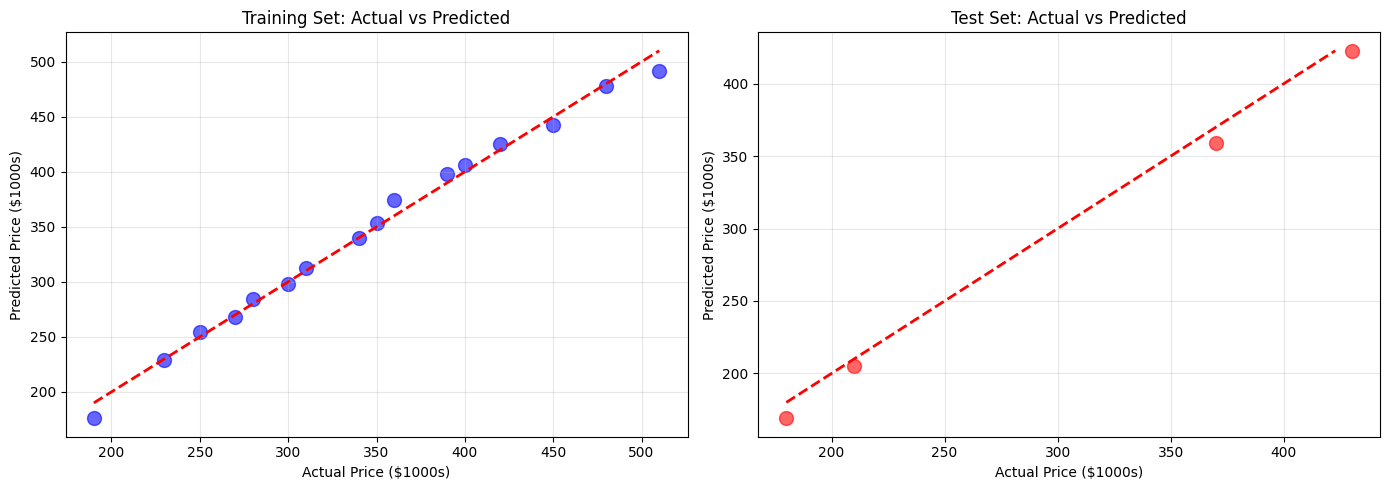

In [75]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Training set
axes[0].scatter(y_train, y_train_pred, alpha=0.6, s=100, color='blue')
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Price ($1000s)')
axes[0].set_ylabel('Predicted Price ($1000s)')
axes[0].set_title('Training Set: Actual vs Predicted')
axes[0].grid(True, alpha=0.3)

# Testing set
# TODO: Complete the test set plot
axes[1].scatter(y_test, y_test_pred, alpha = 0.6, s=100, color= "red") # TODO
axes[1].plot([y_test.min(), y_test_pred.max()],[y_test.min(), y_test_pred.max()], "r--", lw=2 )# TODO
axes[1].set_xlabel('Actual Price ($1000s)')
axes[1].set_ylabel('Predicted Price ($1000s)')
axes[1].set_title('Test Set: Actual vs Predicted')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


 ### Final Discussion Questions



 **1. How do the training and test errors compare? What does this tell you? (Recall our discussion on overfitting and underfitting from last week)**

The training set had lower MAE, MSE, and RMSE than the test set. This shows overfitting because it performs very well on the training data but performs poorly on the testing data. 





 ---



 **2. Which feature has the strongest effect on house price? How can you tell?**



The number of bedrooms has the strongest effect on house price because it has the highest absolute coefficient value of 9.74. 



 ---



 **3. What is one limitation of this model?**



 One limitation is that the dataset only consists of 20 data points, so the size of the train and test sets are very small. This leads to the model learning from limited data and the results may be statistically unreliable. 



 ---